In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

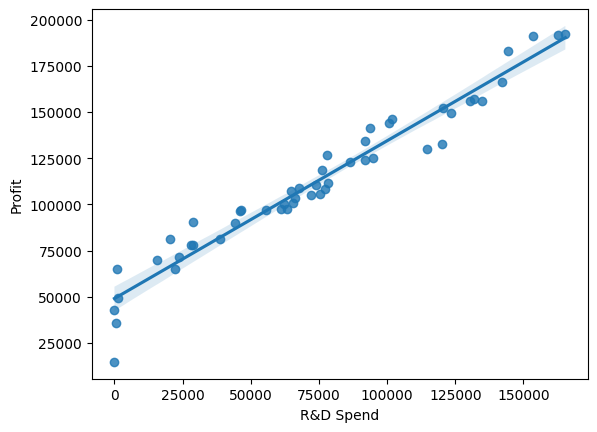

In [4]:
sns.regplot(df, x='R&D Spend' ,y= 'Profit')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

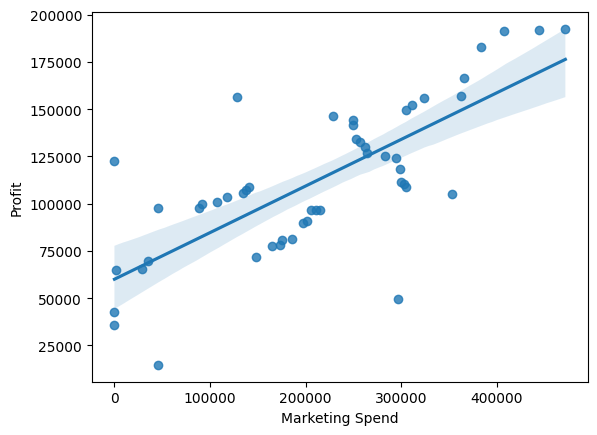

In [5]:
sns.regplot(df,x='Marketing Spend',y='Profit')

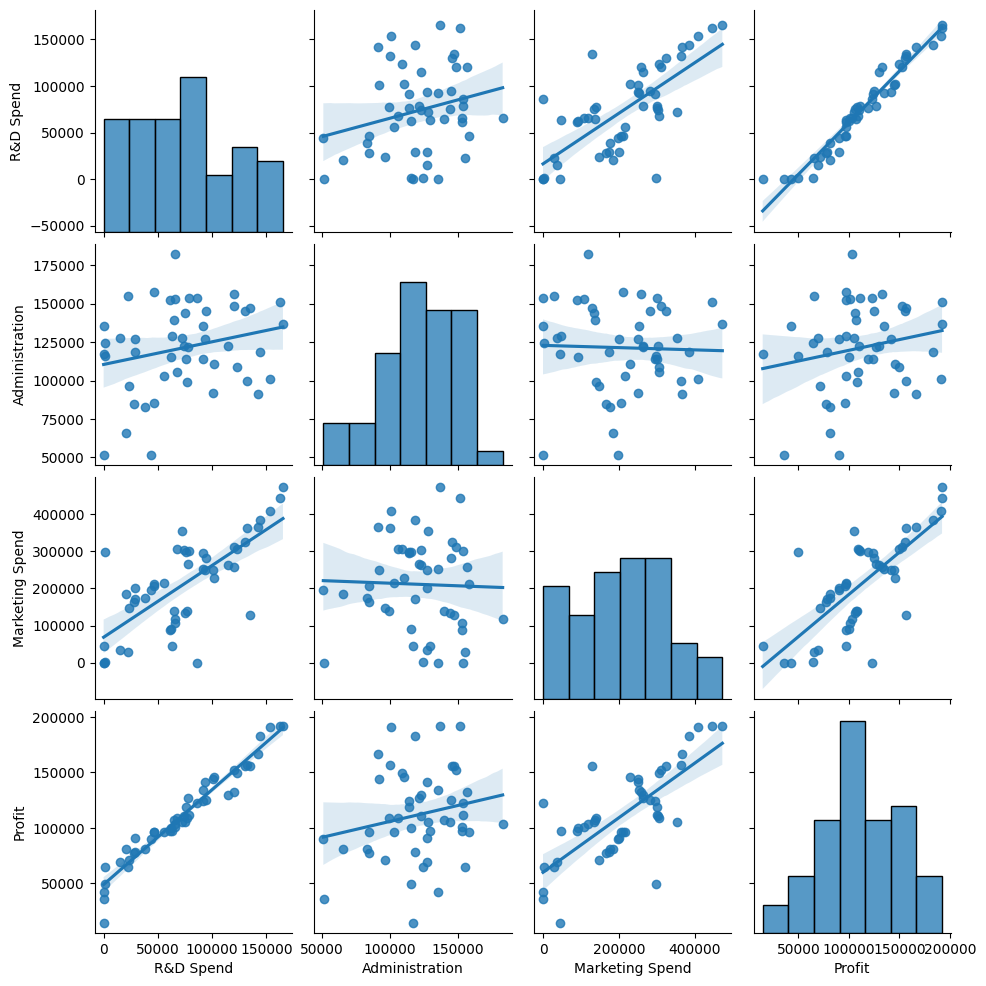

In [6]:
sns.pairplot(df,kind='reg')

<Axes: xlabel='State', ylabel='Profit'>

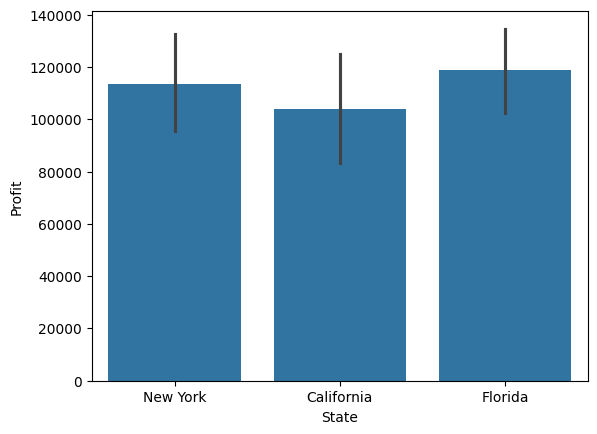

In [7]:
sns.barplot(df,x="State",y='Profit')

In [8]:
X= df.drop(columns=['Profit'])
y= df['Profit']

In [9]:
print(X)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [10]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [11]:
Xtrain , Xtest , ytrain ,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

Column Selection

In [12]:
cat_cols=X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['number']).columns

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


PipeLine

In [14]:
cat_pipe=Pipeline(
    steps=[
        ('encoder',OneHotEncoder(drop='first'))
    ]
)


In [15]:
num_pipe=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [16]:
preprocessor= ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_cols),
    ('num',num_pipe,num_cols)
])

In [17]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

In [18]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['State'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object'))])),
                ('lr', LinearRegression())])

In [19]:

from joblib import dump, load #dump is used to save the model and load is used to load the model 
with open('models/multiple_linear_regression.pkl','wb')as f:
    dump(model, f) # dumping the model into the file
    print("Model dumped successfully")

Model dumped successfully


In [20]:
! pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
# make a single record DataFrame
def prediction(rnd, admin,marketing, state):
    df=pd.Dataframe({
        'R&D spend':[rnd],
        'Administration':[admin],
        'Marketing Spend':[marketing],
        'state':[state],
    })
    #load joblib model file
    with open('models/multiple_linear_regression.pkl','wb')as f:
        model=load(f)


    #predict the profit
    profit =model.predict(df)# return the numpy array
    return profit[0]#return the profit value
ui= gr.Interface(
    fn=prediction,
    inputs=['number','number','number','text'],
    outputs=gr.Text(),
    title='50 startups profut prediction',
    examples=[[165349,136897,471784,'New York']]
)
ui.launch()

c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 2220, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 1731, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_bac

Created dataset file at: .gradio\flagged\dataset1.csv


Traceback (most recent call last):
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 2220, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\gradio\blocks.py", line 1731, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_bac